In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from gensim import corpora, models, similarities
import numpy as np
import ast

In [6]:
## We import the similarity measures on groundtruth data

df_results = pd.read_csv('data/04_similarity_results.csv')

In [5]:
## for each topic model with associated lexicon and number of topics
##     - we sort the snippets by decreasing order of associated similarity measures.
##     - we count how many snippets are relevant and on the top of the list (i.e their similarity
## measures are above all similarity measures of irrelevant snippets)
##     - We look at the difference between the minimum similarity measure of the relevant snippets
## in the top list and the maximum similarity measure of all irrelevant snippets

models = {'lsi':[],'rp':[], 'lda':[]}
thresholds = {'lsi':[],'rp':[], 'lda':[]}
nb_topics = np.arange(100,350,50)
for model in models:
    for nb_word in sorted(list(np.arange(10000,40000,5000)),reverse=True):
        for nb_topic in nb_topics:
            df_ = df_results[['groundtruth_label',model+str(nb_word/1000)+'_'+str(nb_topic)]]\
            .sort_values(by=[model+str(nb_word/1000)+'_'+str(nb_topic)],ascending=False)
            labels_ = list(df_['groundtruth_label'].as_matrix())
            sims_ = list(df_[model+str(nb_word/1000)+'_'+str(nb_topic)].as_matrix())
            count = 0
            threshold_up = 1
            threshold_down = 1
            first = True
            for i in range(0,len(labels_)):
                if labels_[i]==True:
                    count+=1
                    threshold_up = sims_[i]
                    first = False
                else:
                    if not first:
                        threshold_down = sims_[i]
                    break
            models[model].append(count)
            thresholds[model].append(threshold_up)
            thresholds[model].append(threshold_down)
tuples_models = []
tuples_thresholds = []
for nb_word in sorted(list(np.arange(10000,40000,5000)),reverse=True):
        for nb_topic in nb_topics:
            tuples_models.append((nb_word,nb_topic))
            tuples_thresholds.append((nb_word,nb_topic,'up'))
           tuples_thresholds.append((nb_word,nb_topic,'down'))
        
index_models = pd.MultiIndex.from_tuples(tuples_models, names=['nb_word', 'nb_topic'])
index_thresholds = pd.MultiIndex.from_tuples(tuples_thresholds, names=['nb_word','limit'])

df_count_topics = pd.DataFrame(models, index=index_models).unstack()
df_thresholds_topics = pd.DataFrame(thresholds, index=index_thresholds).unstack()
df_thresholds_topics_2 = pd.DataFrame({'lsi': (df_thresholds_topics['lsi']['up'] - df_thresholds_topics['lsi']['down']).apply(lambda x: int(100*x)/100),
                                'lda': (df_thresholds_topics['lda']['up'] - df_thresholds_topics['lda']['down']).apply(lambda x: int(100*x)/100), 
                                'rp': (df_thresholds_topics['rp']['up'] - df_thresholds_topics['rp']['down']).apply(lambda x: int(100*x)/100)},
                              index = df_thresholds.index).unstack()

print(df_counts_topic)
print(df_thresholds_topics_2)

In [ ]:
## for each base model (bow and tfidf) with associated lexicon
##     - we sort the snippets by decreasing order of associated similarity measures.
##     - we count how many snippets are relevant and on the top of the list (i.e their similarity
## measures are above all similarity measures of irrelevant snippets)
##     - We look at the difference between the minimum similarity measure of the relevant snippets
## in the top list and the maximum similarity measure of all irrelevant snippets

models = {'bow':[],'tfidf':[]}
thresholds = {'bow':[],'tfidf':[]}
for model in models:
    for nb_word in sorted(list(np.arange(10000,40000,5000)),reverse=True):
        df_ = df_results[['groundtruth_label',model+str(nb_word/1000)]]\
        .sort_values(by=[model+str(nb_word/1000)],ascending=False)
        labels_ = list(df_['groundtruth_label'].as_matrix())
        sims_ = list(df_[model+str(nb_word/1000)].as_matrix())
        count = 0
        threshold_up = 1
        threshold_down = 1
        first = True
        for i in range(0,len(labels_)):
            if labels_[i]==True:
                count+=1
                threshold_up = sims_[i]
                first = False
            else:
                if not first:
                    threshold_down = sims_[i]
                break
        models[model].append(count)
        thresholds[model].append(threshold_up)
        thresholds[model].append(threshold_down)
        
tuples_models = []
tuples_thresholds = []
for nb_word in sorted(list(np.arange(10000,40000,5000)),reverse=True):
        tuples_models.append(nb_word)
        tuples_thresholds.append((nb_word,'up'))
        tuples_thresholds.append((nb_word,'down'))
index_thresholds = pd.MultiIndex.from_tuples(tuples_thresholds, names=['nb_word','limit'])

df_counts_base = pd.DataFrame(models, index=tuples_models).unstack()
df_thresholds_base = pd.DataFrame(thresholds, index=index_thresholds).unstack()
df_thresholds_base_2 = pd.DataFrame({'bow': (df_thresholds_base['bow']['up'] - df_thresholds_base['bow']['down']).apply(lambda x: int(100*x)/100),
                                'tfidf': (df_thresholds_base['tfidf']['up'] - df_thresholds_base['tfidf']['down']).apply(lambda x: int(100*x)/100)},
                              index = df_thresholds.index).unstack()
print(df_counts_base)
print(df_thresholds_base_2)

0.6477783620357513


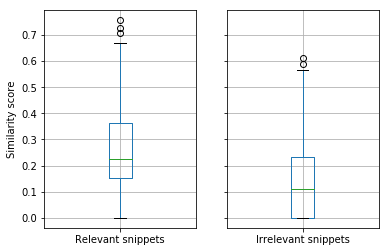

In [35]:
## We choose the lda topic model with the 30k lexicon and 200 topics
## Here the boxplots of similarity measures accross relevant and irrelevant snippets

fig, axs = plt.subplots(1,2, sharey = True)
ax = df_results[df_results['groundtruth_label']==True][['lda30.0_200']].boxplot(ax=axs[0])
ax.set_xticklabels(['Relevant snippets'])
ax.set_ylabel('Similarity score')
print(df_results[df_results['groundtruth_label']==True]['lda30.0_200'].quantile(0.95))
ax = df_results[df_results['groundtruth_label']==False][['lda30.0_200']].boxplot(ax=axs[1])
ax.set_xticklabels(['Irrelevant snippets'])

plt.savefig('05_similarity_scores_snippets.png')